# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata,study_results, how="left", on=["Mouse ID", "Mouse ID"])
df.set_index("Drug Regimen", inplace=True )
# Display the data table for preview
df.head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(df["Mouse ID"].unique())

num_mice

249

In [9]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df.drop_duplicates(subset=["Mouse ID", "Timepoint"])

df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...
Naftisol,z969,Male,9,30,25,63.145652,2
Naftisol,z969,Male,9,30,30,65.841013,3
Naftisol,z969,Male,9,30,35,69.176246,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
df_dup = df[df[["Mouse ID", "Timepoint"]].duplicated()]
df_dup

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Propriva,g989,Female,21,26,0,45.000000,0
Propriva,g989,Female,21,26,5,47.570392,0
Propriva,g989,Female,21,26,10,49.880528,0
Propriva,g989,Female,21,26,15,53.442020,0
Propriva,g989,Female,21,26,20,54.657650,1


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# do a loc function
df_clean = df
#df_clean = df.loc[]
df_clean = df.loc[df['Mouse ID'] != 'g989' , : ]
df_clean.head()
# Set display options to show the entire DataFrame
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# Print the entire DataFrame
# print(cleaned_df)



,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Ramicane,k403,Male,21,16,0,45.000000,0
Ramicane,k403,Male,21,16,5,38.825898,0
Ramicane,k403,Male,21,16,10,35.014271,1
Ramicane,k403,Male,21,16,15,34.223992,1
Ramicane,k403,Male,21,16,20,32.997729,1


In [36]:
# Checking the number of mice in the clean DataFrame.
#why 249 instead of 248
num_clean = len(df_clean["Mouse ID"].unique())

num_clean



248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_mean = pd.DataFrame(df_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean())
tumor_median = pd.DataFrame(df_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median())
tumor_var = pd.DataFrame(df_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var())
tumor_std = pd.DataFrame(df_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std())
tumor_sem = pd.DataFrame(df_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem())



In [38]:

tumor_mean = df_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(
    {
        "mean", 
        "median",
        "var",
        "std",
        "sem"
    }
)

tumor_mean


#tumor_summary = pd.merge(tumor_mean, tumor_median, how='outer', left_index=True, right_index=True)
#tumor_summary = pd.merge(tumor_summary, tumor_var, how='outer', left_index=True, right_index=True)
#tumor_summary = tumor_summary.rename(columns= {"Tumor Volume (mm3)_x": mean, "Tumor Volume (mm3)_y" : "median", "	Tumor Volume (mm3)" : "var"})
#tumor_summary = pd.merge(tumor_summary, tumor_std, how='outer', left_index=True, right_index=True)
#tumor_summary= pd.merge(tumor_summary, tumor_sem, how='outer', left_index=True, right_index=True)





,std,sem,var,mean,median
Drug Regimen,,,,,
Capomulin,4.994774,0.329346,24.947764,40.675741,41.557809
Ceftamin,6.268188,0.469821,39.290177,52.591172,51.776157
Infubinol,6.567243,0.492236,43.128684,52.884795,51.820584
Ketapril,8.279709,0.603860,68.553577,55.235638,53.698743
Naftisol,8.134708,0.596466,66.173479,54.331565,52.509285
Placebo,7.821003,0.581331,61.168083,54.033581,52.288934
Propriva,6.622085,0.544332,43.852013,52.320930,50.446266
Ramicane,4.846308,0.320955,23.486704,40.216745,40.673236
Stelasyn,7.710419,0.573111,59.450562,54.233149,52.431737


In [39]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
tumor_mean = df_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(
    {
        "mean", 
        "median",
        "var",
        "std",
        "sem"
    }
)

tumor_mean

,std,sem,var,mean,median
Drug Regimen,,,,,
Capomulin,4.994774,0.329346,24.947764,40.675741,41.557809
Ceftamin,6.268188,0.469821,39.290177,52.591172,51.776157
Infubinol,6.567243,0.492236,43.128684,52.884795,51.820584
Ketapril,8.279709,0.603860,68.553577,55.235638,53.698743
Naftisol,8.134708,0.596466,66.173479,54.331565,52.509285
Placebo,7.821003,0.581331,61.168083,54.033581,52.288934
Propriva,6.622085,0.544332,43.852013,52.320930,50.446266
Ramicane,4.846308,0.320955,23.486704,40.216745,40.673236
Stelasyn,7.710419,0.573111,59.450562,54.233149,52.431737


## Bar and Pie Charts

<Axes: xlabel='Drug name', ylabel='total rows'>

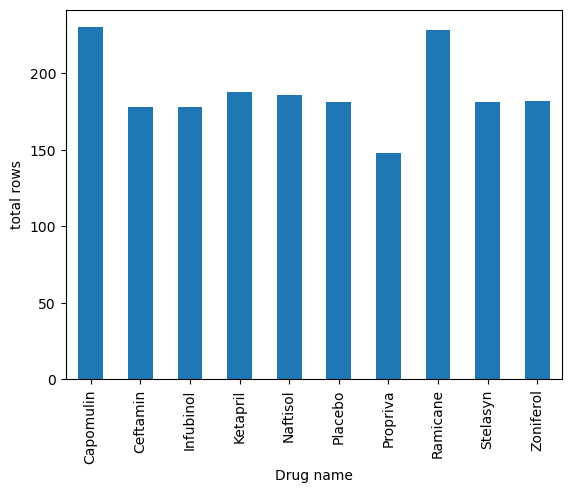

In [152]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_total= df_clean.groupby(["Drug Regimen"])["Mouse ID"].count()
#drug_total
drug_total.plot(kind= "bar", xlabel= "Drug name", ylabel= "total rows" )

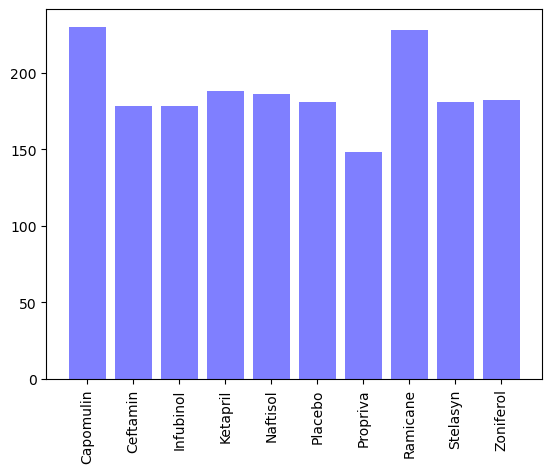

In [140]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
df_count=pd.DataFrame(drug_total)
count = df_count["Mouse ID"]
drugs = df_count.index.unique()

plt.bar(drugs,count,color="blue", align= "center")
plt.xticks(rotation= 'vertical')
plt.xlabel= "Drug name"
plt.ylabel= "total rows"
plt.show()

<Axes: ylabel='Mouse ID'>

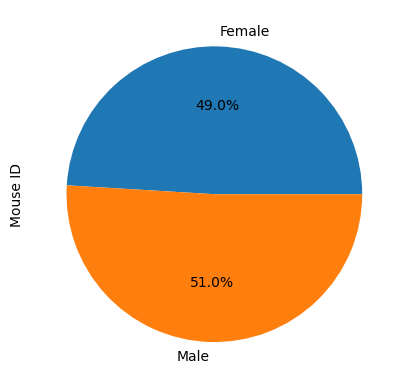

In [146]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Geneder_total= df_clean.groupby(["Sex"])["Mouse ID"].count()
#Geneder_total

Geneder_total.plot(kind="pie",  autopct="%1.1f%%")

In [144]:
df_pie=pd.DataFrame(Geneder_total)

df_pie

,Mouse ID
Sex,
Female,922
Male,958


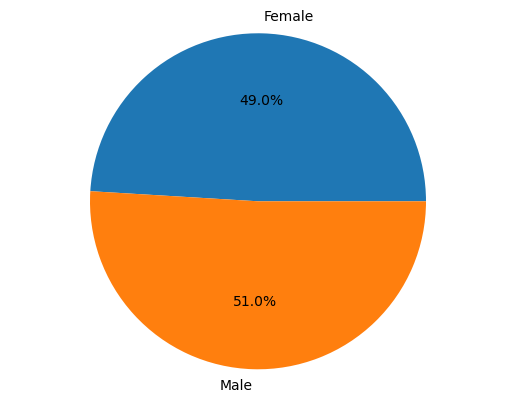

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df_pie=pd.DataFrame(Geneder_total)
pie1 = df_pie["Mouse ID"]
pie2 = df_pie.index.unique()

plt.pie(pie1,labels= pie2,
        autopct="%1.1f%%")
plt.axis("equal")
plt.title = "Mouse ID"

plt.show()



## Quartiles, Outliers and Boxplots

In [102]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
last = pd.DataFrame(df_clean.groupby("Mouse ID")["Timepoint"].max())
# Start by getting the last (greatest) timepoint for each mouse
#last = study_results.loc[study_results["Timepoint"] == 45,:]
last
#last_2 =pd.merge(mouse_metadata,last, how="left", on=["Mouse ID", "Mouse ID"])
#last_2 = last.loc[last["Drug Regime"]]
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
#last_vol = last.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sum()
last_2 = pd.merge(last, df_clean, on= ['Mouse ID', 'Timepoint'])
last_2

last_3 = pd.merge(last_2, mouse_metadata, on= ['Mouse ID'])
last_3
Capomulin_df = last_3.loc[last_3["Drug Regimen"] =="Capomulin",:]
Capomulin_df
Ramicane_df = last_3.loc[last_3["Drug Regimen"] =="Ramicane",:]
Infubinol_df = last_3.loc[last_3["Drug Regimen"] =="Infubinol",:]
Ceftamin_df = last_3.loc[last_3["Drug Regimen"] =="Ceftamin",:]

vol_Capomulin_df = Capomulin_df["Tumor Volume (mm3)"]

vol_Ramicane_df = Ramicane_df["Tumor Volume (mm3)"]
vol_Infubinol_df = Infubinol_df["Tumor Volume (mm3)"]
vol_Ceftamin_df = Ceftamin_df["Tumor Volume (mm3)"]


In [103]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
vol={"Capomulin" : vol_Capomulin_df, "Ramicane": vol_Ramicane_df, "Infubinol": vol_Infubinol_df, "Ceftamin": vol_Ceftamin_df}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_Capomulin = vol_Capomulin_df.quantile([.25,.5,.75])
lowerq_Cap = quartiles_Capomulin[0.25]
upperq_Cap = quartiles_Capomulin[0.75]
iqr_Capomulin = upperq_Cap-lowerq_Cap
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
quartiles_Ramicane = vol_Ramicane_df.quantile([.25,.5,.75])
lowerq_Ram = quartiles_Ramicane[0.25]
upperq_Ram = quartiles_Ramicane[0.75]
iqr_Ram = upperq_Ram-lowerq_Ram
    
    # add subset 
quartiles_inf = vol_Infubinol_df.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf
    
    # Determine outliers using upper and lower bounds
quartiles_cef = vol_Ceftamin_df.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef

{'whiskers': [<matplotlib.lines.Line2D at 0x28dddf6d5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x28dddf6ed90>,
 'boxes': [<matplotlib.lines.Line2D at 0x28ddde74b10>,
 'medians': [<matplotlib.lines.Line2D at 0x28dddf74b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x28dddf74710>,
 'means': []}

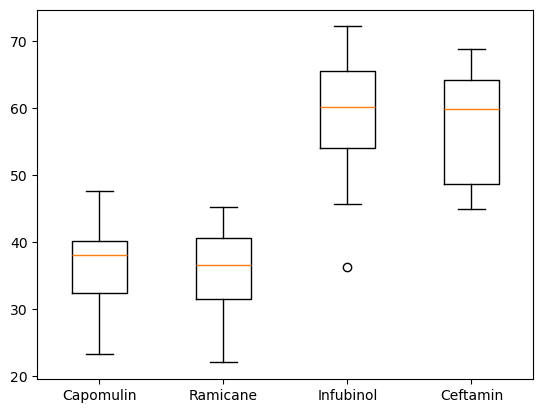

In [105]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.boxplot(vol.values(), labels=treatments)


## Line and Scatter Plots

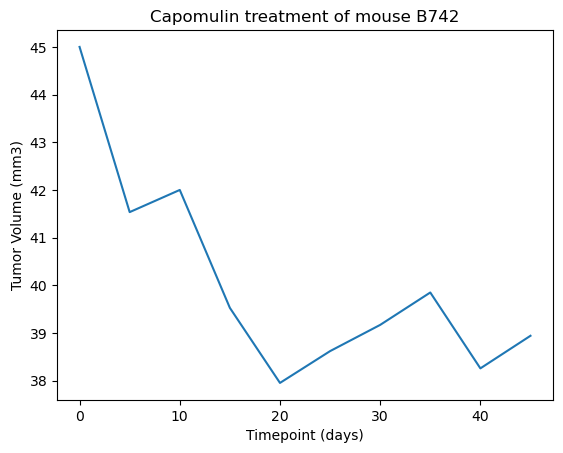

In [114]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
one_m = df_clean.loc[df_clean["Mouse ID"] == "b742", ["Timepoint", "Tumor Volume (mm3)"]]

x_axis = one_m["Timepoint"]
y_axis = one_m["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)
plt.title("Capomulin treatment of mouse B742")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



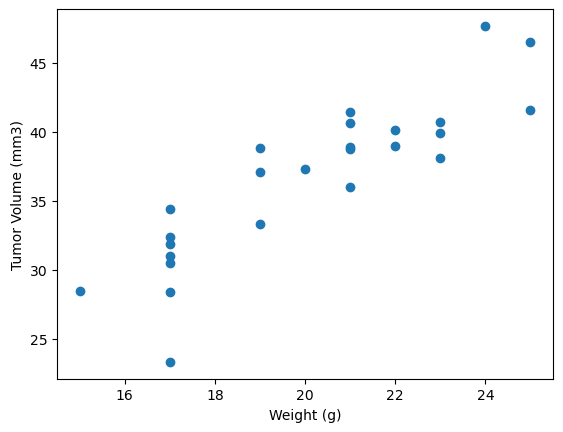

In [115]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight = Capomulin_df["Weight (g)_x"]
tumor_vol = Capomulin_df["Tumor Volume (mm3)"]
plt.scatter(weight,tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [119]:
from scipy import stats

The correlation coefficient between weight and tumor size is 0.88


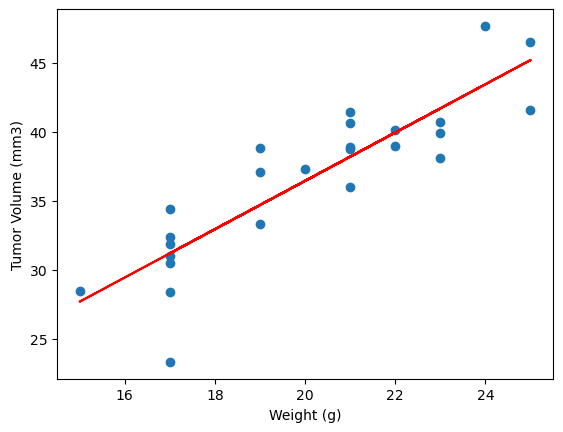

In [127]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(pe_slope, pe_int, pe_r, pe_p, pe_std_err) = stats.linregress(weight, tumor_vol)
pe_fit = pe_slope * weight + pe_int
print(f"The correlation coefficient between weight and tumor size is {round(st.pearsonr(weight,tumor_vol)[0],2)}")
plt.scatter(weight,tumor_vol)
plt.plot(weight,pe_fit, color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()